In [31]:
import sys
#!{sys.executable} -m pip install <package list>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

#regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import GridSearchCV

In [ ]:
#Data Wrangling & Visualization

In [32]:
# The dataset is already loaded below
data = pd.read_csv("/content/AB_NYC_2019.csv")

In [33]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [34]:
#Explore columns
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [35]:
#Description
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [36]:
data.info()
# there are some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [37]:
#Below is the missing count
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Visualization

In [11]:
#1 room_type, neighborhood and neighborhood_group (discrete variables)

data.room_type.value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [14]:
data.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
New Dorp                 1
Fort Wadsworth           1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [15]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [38]:
#1 neighbourhood_group 
data_ng = data["neighbourhood_group"]

dum_df1 = pd.get_dummies(data_ng, columns=["neighbourhood_group"], prefix="ng")
dum_df1.head(10)

#add these features into the main training df
data = data.join(dum_df1)

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0


In [39]:
#2 room_type 
data_ng = data["room_type"]

dum_df2 = pd.get_dummies(data_ng, columns=["room_type"], prefix="roomtyp")
dum_df2.head(10)

#add these features into the main training df
data = data.join(dum_df2)

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,roomtyp_Entire home/apt,roomtyp_Private room,roomtyp_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0


In [41]:
#split the train and test data
tr_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print("Training set count: ", len(tr_data))
print("Test set count: ",len(test_data))

Training set count:  39116
Test set count:  9779


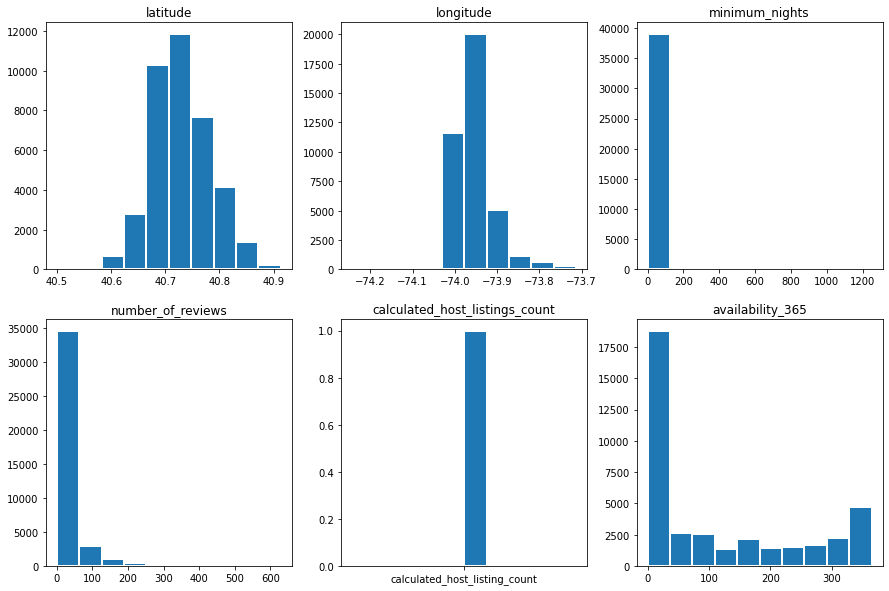

In [42]:
#2 latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
#(continuous variables)

viz1, axes = plt.subplots(2,3)

axes[0,0].hist(x="latitude", data=tr_data, linewidth=2, edgecolor="white")
axes[0,0].set_title("latitude")
axes[0,1].hist(x="longitude", data=tr_data, linewidth=2, edgecolor="white")
axes[0,1].set_title("longitude")
axes[0,2].hist(x="minimum_nights", data=tr_data, linewidth=2, edgecolor="white")
axes[0,2].set_title("minimum_nights")
axes[1,0].hist(x="number_of_reviews", data=tr_data, linewidth=2, edgecolor="white")
axes[1,0].set_title("number_of_reviews")
axes[1,1].hist(x="calculated_host_listing_count", data=tr_data, linewidth=2, edgecolor="white")
axes[1,1].set_title("calculated_host_listings_count")
axes[1,2].hist(x="availability_365", data=tr_data, linewidth=2, edgecolor="white")
axes[1,2].set_title("availability_365")

viz1.set_size_inches(15,10)

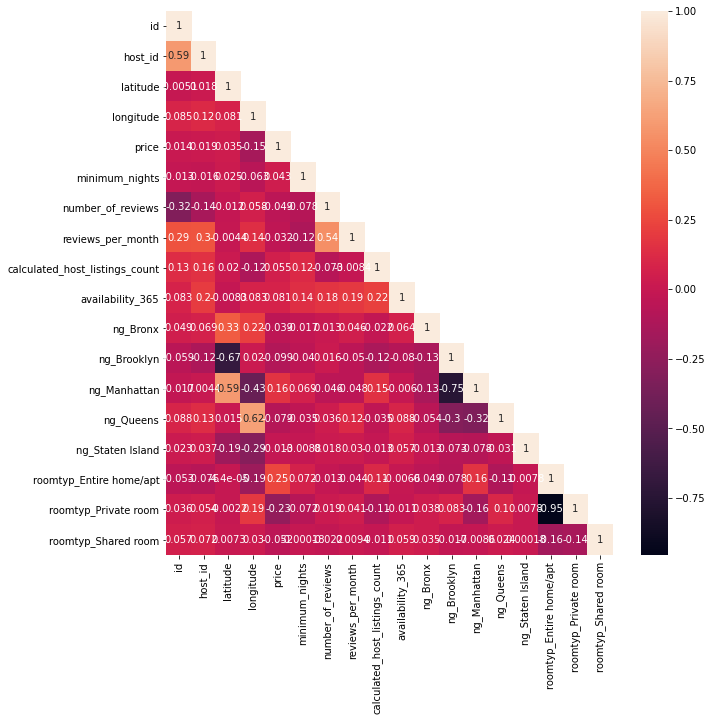

In [43]:
#Corelation Matrix
#1 visualize in a heatmap

tr_cor_mat=tr_data.corr()

tr_mask=np.array(tr_cor_mat)
tr_mask[np.tril_indices_from(tr_mask)] = False

viz2=plt.gcf()
viz2.set_size_inches(10,10)

sb.heatmap(data=tr_cor_mat, mask=tr_mask, annot=True)

In [44]:
#Corelation Matrix
#2 Looks at the values

tr_cor_mat["price"].sort_values(ascending=False)

price                             1.000000
roomtyp_Entire home/apt           0.248010
ng_Manhattan                      0.162371
availability_365                  0.080562
calculated_host_listings_count    0.055336
minimum_nights                    0.042740
latitude                          0.035015
host_id                           0.018624
id                                0.014213
ng_Staten Island                 -0.013286
reviews_per_month                -0.031568
ng_Bronx                         -0.039326
number_of_reviews                -0.048926
roomtyp_Shared room              -0.052495
ng_Queens                        -0.079259
ng_Brooklyn                      -0.098573
longitude                        -0.149080
roomtyp_Private room             -0.232813
Name: price, dtype: float64